RETAIL SALES DATA ANALYZER


Enter CSV file path:  E:\rwa6 vastral(Ai ml & data scince)\projects\final project\retail_sales.csv


Dataset loaded successfully

Select an option:
1. View Summary
2. Filter Data
3. Bar Chart
4. Line Chart
5. Heatmap
6. Exit


Enter choice:  1


----- SALES SUMMARY -----
Total Sales: 284900
Average Sales: 28490.0
Most Popular Product: Laptop
--------------------------

Select an option:
1. View Summary
2. Filter Data
3. Bar Chart
4. Line Chart
5. Heatmap
6. Exit


Enter choice:  2
Filter Column:  2
Filter Value:  65


Invalid column

Select an option:
1. View Summary
2. Filter Data
3. Bar Chart
4. Line Chart
5. Heatmap
6. Exit


Enter choice:  3


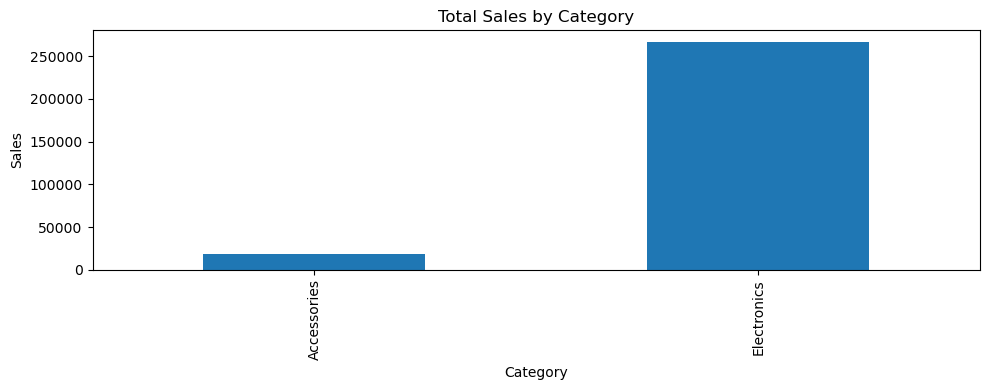


Select an option:
1. View Summary
2. Filter Data
3. Bar Chart
4. Line Chart
5. Heatmap
6. Exit


Enter choice:  4


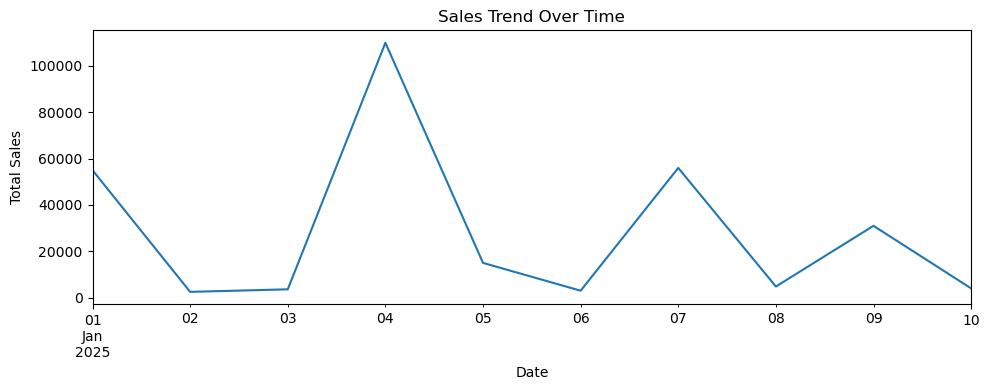


Select an option:
1. View Summary
2. Filter Data
3. Bar Chart
4. Line Chart
5. Heatmap
6. Exit


Enter choice:  5


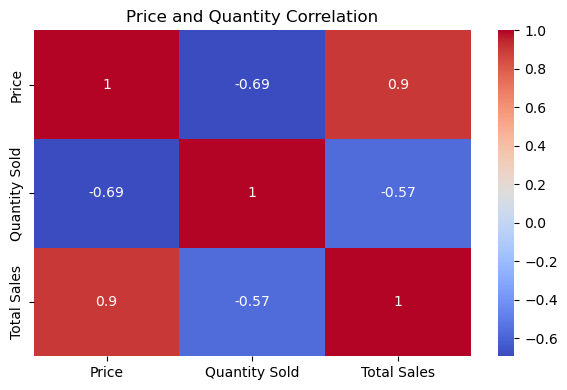


Select an option:
1. View Summary
2. Filter Data
3. Bar Chart
4. Line Chart
5. Heatmap
6. Exit


Enter choice:  6


Exiting Program


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

class RetailAnalyzer:

    def __init__(self):
        self.data = None

    def load_data(self, file_path):

        if not os.path.exists(file_path):
            print("File not found")
            return False

        if not file_path.endswith(".csv"):
            print("Only CSV files allowed")
            return False

        try:
            self.data = pd.read_csv(file_path)

            required_cols = ["Date", "Product", "Category", "Price", "Quantity Sold", "Total Sales"]
            for col in required_cols:
                if col not in self.data.columns:
                    print("Missing Required Column:", col)
                    return False

            print("Dataset loaded successfully")
            return True

        except Exception as e:
            print("Error loading file:", e)
            return False

    def calculate_metrics(self):
        if self.data is None:
            print("Load dataset first")
            return None

        df = self.data

        total_sales = df["Total Sales"].sum()
        avg_sales = df["Total Sales"].mean()
        most_popular_product = df["Product"].mode()[0]

        metrics = {
            "Total Sales": total_sales,
            "Average Sales": avg_sales,
            "Most Popular Product": most_popular_product
        }
        return metrics

    def filter_data(self, column, value):
        if self.data is None:
            print("Load dataset first")
            return None

        if column not in self.data.columns:
            print("Invalid column")
            return None

        filtered = self.data[self.data[column] == value]

        if filtered.empty:
            print("No data found for filter")

        return filtered

    def display_summary(self):
        metrics = self.calculate_metrics()
        if metrics:
            print("----- SALES SUMMARY -----")
            for key, value in metrics.items():
                print(f"{key}: {value}")
            print("--------------------------")

    def bar_chart(self):
        if self.data is None:
            print("Load dataset first")
            return
        
        plt.figure(figsize=(10,4))
        category_sales = self.data.groupby("Category")["Total Sales"].sum()
        category_sales.plot(kind="bar")
        plt.title("Total Sales by Category")
        plt.xlabel("Category")
        plt.ylabel("Sales")
        plt.tight_layout()
        plt.show()

    def line_chart(self):
        if self.data is None:
            print("Load dataset first")
            return
        
        self.data["Date"] = pd.to_datetime(self.data["Date"])
        daily_sales = self.data.groupby("Date")["Total Sales"].sum()

        plt.figure(figsize=(10,4))
        daily_sales.plot(kind="line")
        plt.title("Sales Trend Over Time")
        plt.xlabel("Date")
        plt.ylabel("Total Sales")
        plt.tight_layout()
        plt.show()

    def heatmap(self):
        if self.data is None:
            print("Load dataset first")
            return
        
        plt.figure(figsize=(6,4))
        corr = self.data.corr(numeric_only=True)
        sns.heatmap(corr, annot=True, cmap="coolwarm")
        plt.title("Price and Quantity Correlation")
        plt.tight_layout()
        plt.show()


if __name__ == "__main__":

    analyzer = RetailAnalyzer()

    print("RETAIL SALES DATA ANALYZER")

    file_path = input("Enter CSV file path: ")

    if analyzer.load_data(file_path):

        while True:
            print("\nSelect an option:")
            print("1. View Summary")
            print("2. Filter Data")
            print("3. Bar Chart")
            print("4. Line Chart")
            print("5. Heatmap")
            print("6. Exit")

            choice = input("Enter choice: ")

            if choice == "1":
                analyzer.display_summary()

            elif choice == "2":
                column = input("Filter Column: ")
                value = input("Filter Value: ")
                result = analyzer.filter_data(column, value)
                if result is not None:
                    print(result)

            elif choice == "3":
                analyzer.bar_chart()

            elif choice == "4":
                analyzer.line_chart()

            elif choice == "5":
                analyzer.heatmap()

            elif choice == "6":
                print("Exiting Program")
                break

            else:
                print("Invalid choice")
